In [180]:
import numpy as np
import pandas as pd
import missingno as mi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

xl = pd.ExcelFile("empresas.xlsx")
xl.sheet_names
df = xl.parse("Construtos", index_col='CASOS')
# Viewing dimensions
print(df.shape)
print(df.dtypes)

(90, 12)
LEG_PRAG     float64
LEG_MORAL    float64
LEG_COG      float64
SENSE        float64
SEIZE        float64
RECONF       float64
REC_FIS      float64
REC_FIN        int64
REC_ORG        int64
REC_REL      float64
REC          float64
RESULT         int64
dtype: object


In [181]:
# Data type of features
outputs = ['RESULT']
inputs = ['LEG_PRAG', 'LEG_MORAL', 'LEG_COG', 'SENSE', 'SEIZE', 'RECONF', 'REC_FIS', 'REC_FIN', 'REC_ORG', 'REC_REL', 'REC']
df[list(outputs)] = df[list(outputs)].astype(str)
df[list(inputs)] = df[list(inputs)].astype(float)
print(df.dtypes)
df.describe()

LEG_PRAG     float64
LEG_MORAL    float64
LEG_COG      float64
SENSE        float64
SEIZE        float64
RECONF       float64
REC_FIS      float64
REC_FIN      float64
REC_ORG      float64
REC_REL      float64
REC          float64
RESULT        object
dtype: object


,LEG_PRAG,LEG_MORAL,LEG_COG,SENSE,SEIZE,RECONF,REC_FIS,REC_FIN,REC_ORG,REC_REL,REC
count,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00
mean,4.43,4.65,4.58,4.13,4.11,3.81,3.88,3.20,3.86,3.93,3.72
std,0.83,0.63,0.66,0.79,0.97,0.83,1.09,1.08,1.07,0.94,0.77
min,1.00,1.00,1.00,1.50,1.00,1.25,1.00,1.00,1.00,1.00,1.75
25%,4.00,4.33,4.50,3.67,4.00,3.50,3.00,3.00,3.00,3.00,3.25
50%,5.00,5.00,5.00,4.33,4.00,4.00,4.00,3.00,4.00,4.00,3.88
75%,5.00,5.00,5.00,5.00,5.00,4.50,5.00,4.00,5.00,5.00,4.25
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [182]:
dabl.clean(df, verbose=2).head(2)

Detected feature types:
continuous      9
dirty_float     0
low_card_int    0
categorical     3
date            0
free_string     0
useless         0
dtype: int64


,LEG_PRAG,LEG_MORAL,LEG_COG,SENSE,SEIZE,RECONF,REC_FIS,REC_FIN,REC_ORG,REC_REL,REC,RESULT
CASOS,,,,,,,,,,,,
C1,5.00,4.33,4.00,3.00,3.00,3.50,2.00,1.0,2.0,3.00,2.00,1
C2,4.00,5.00,5.00,3.67,3.00,3.00,4.00,4.0,3.0,3.00,3.50,1


In [183]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("exploratory analysis.html")

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [184]:
# Importing 
import sweetviz as sv
# Analyzing & Display the
sweetviz_report = sv.analyze(df)
sweetviz_report.show_html('graficos univariados.html')

                                             |          | [  0%]   00:00 -> (? left)

Report graficos univariados.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Shape of your Data Set: (90, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  11
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification VISUALIZATION Started #####################


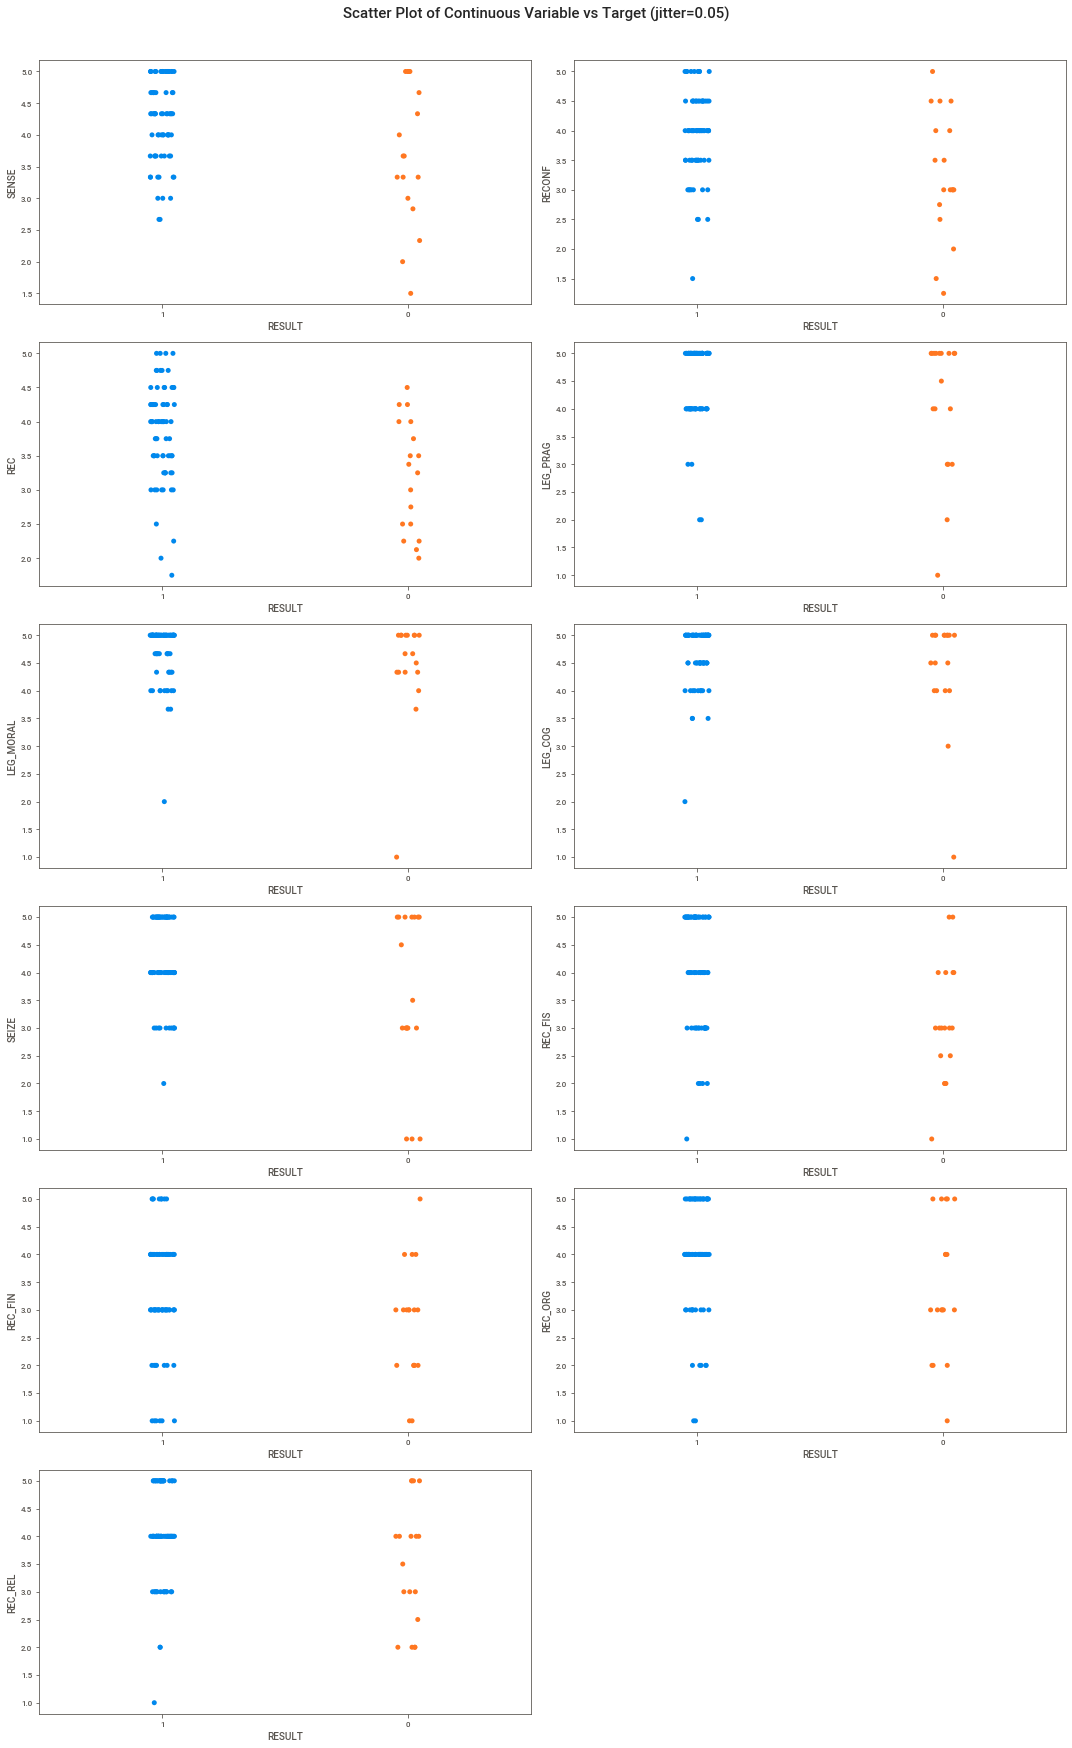

Total Number of Scatter Plots = 66


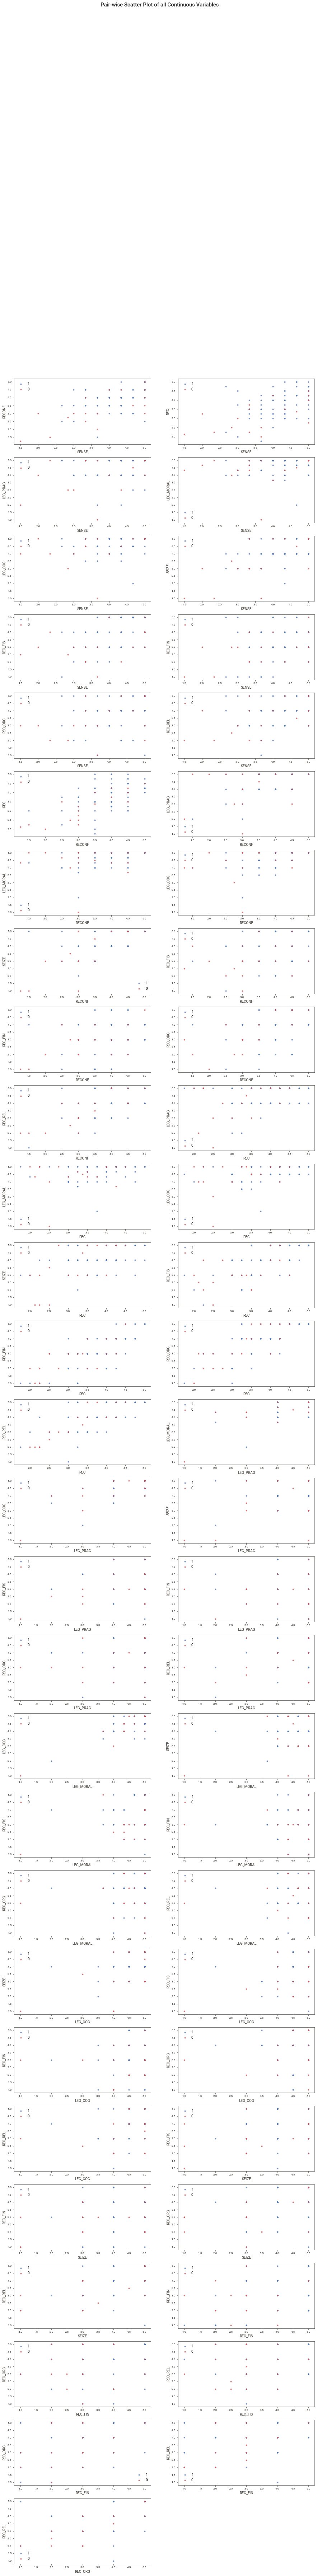

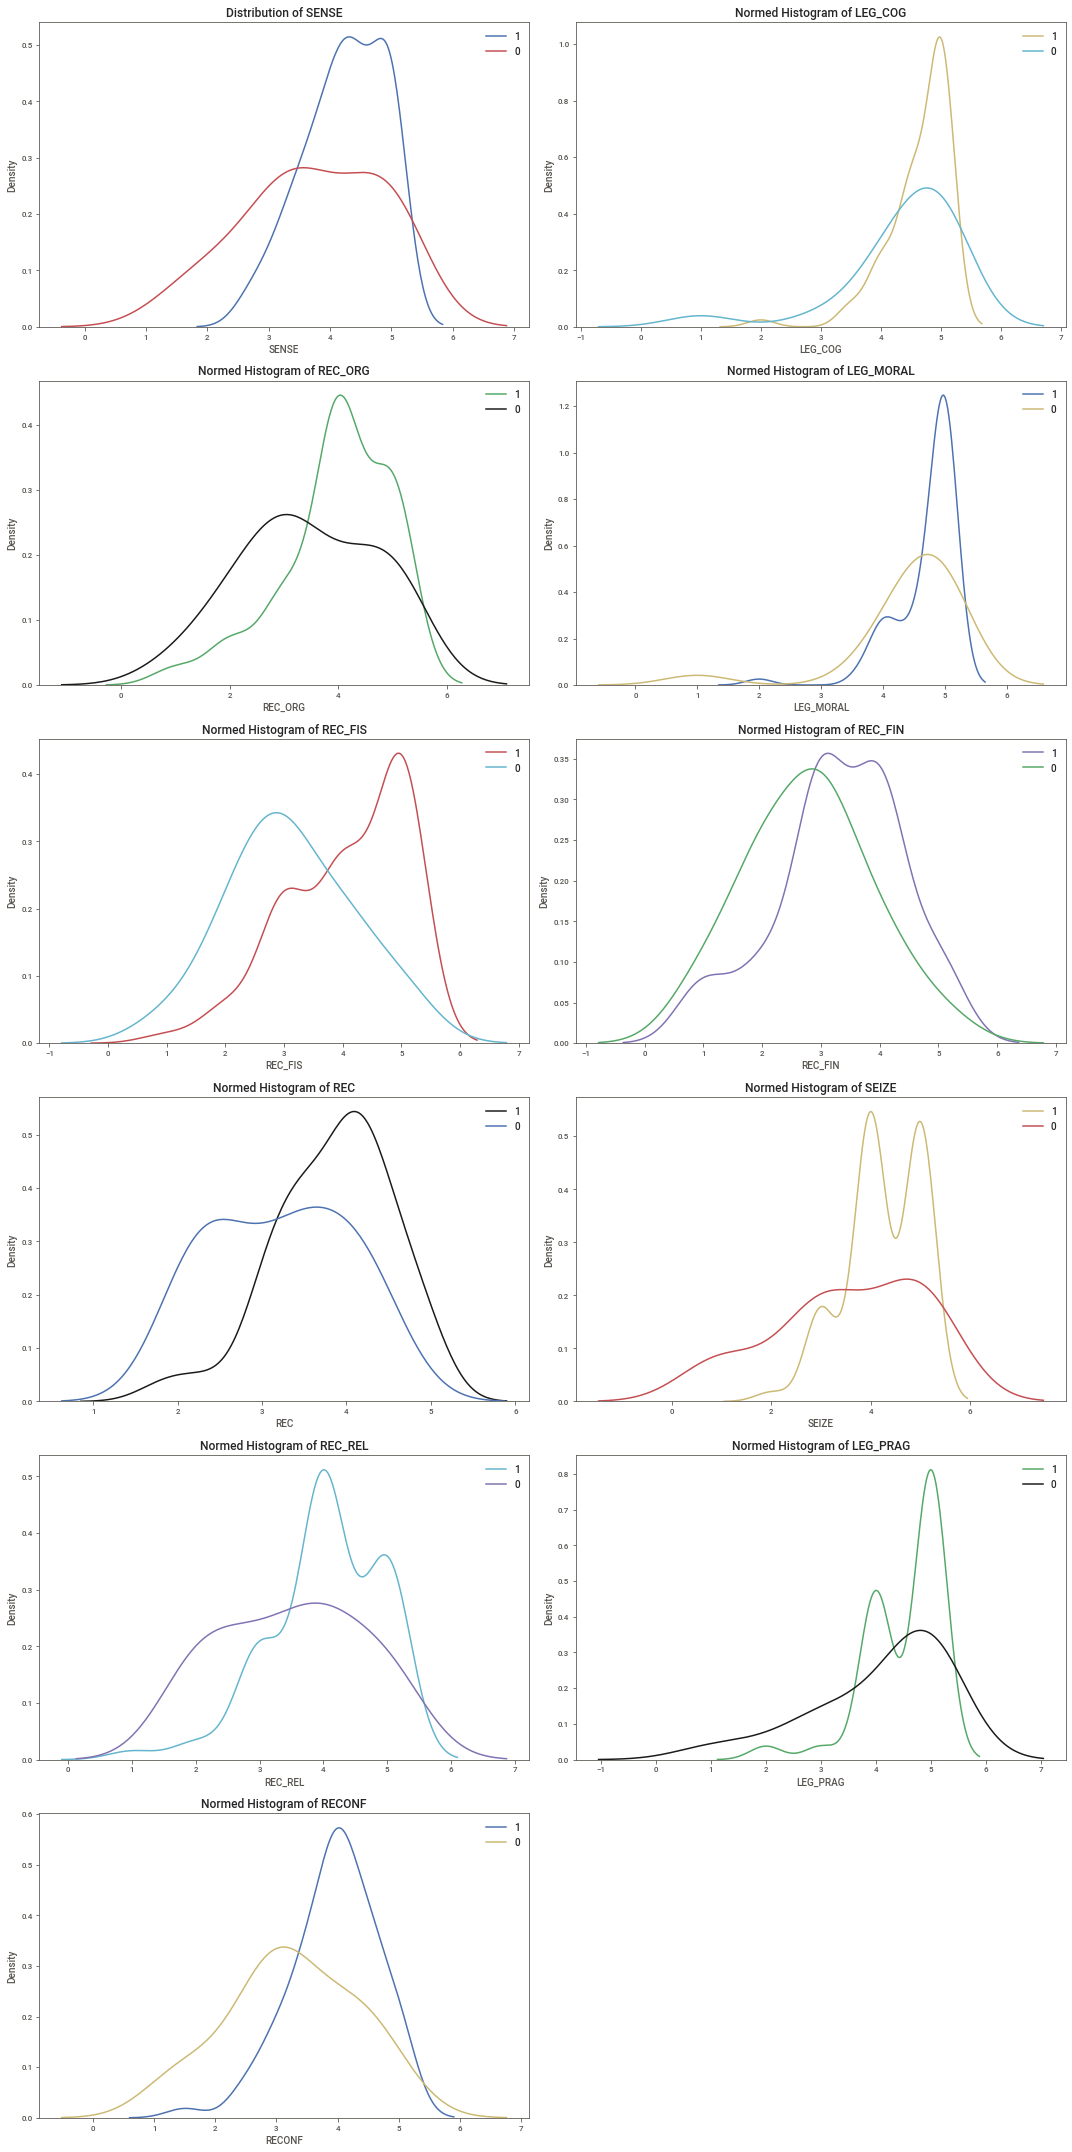

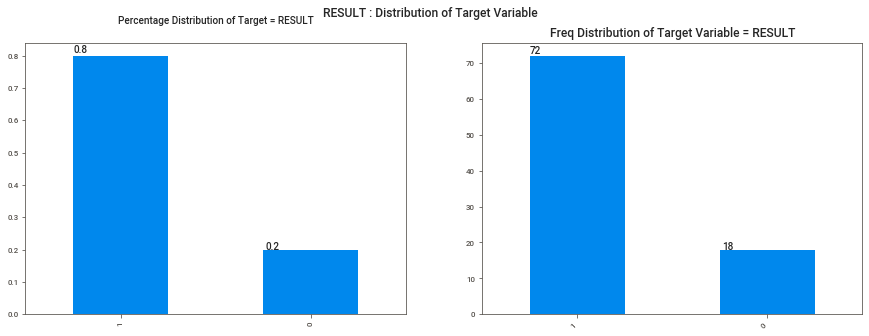

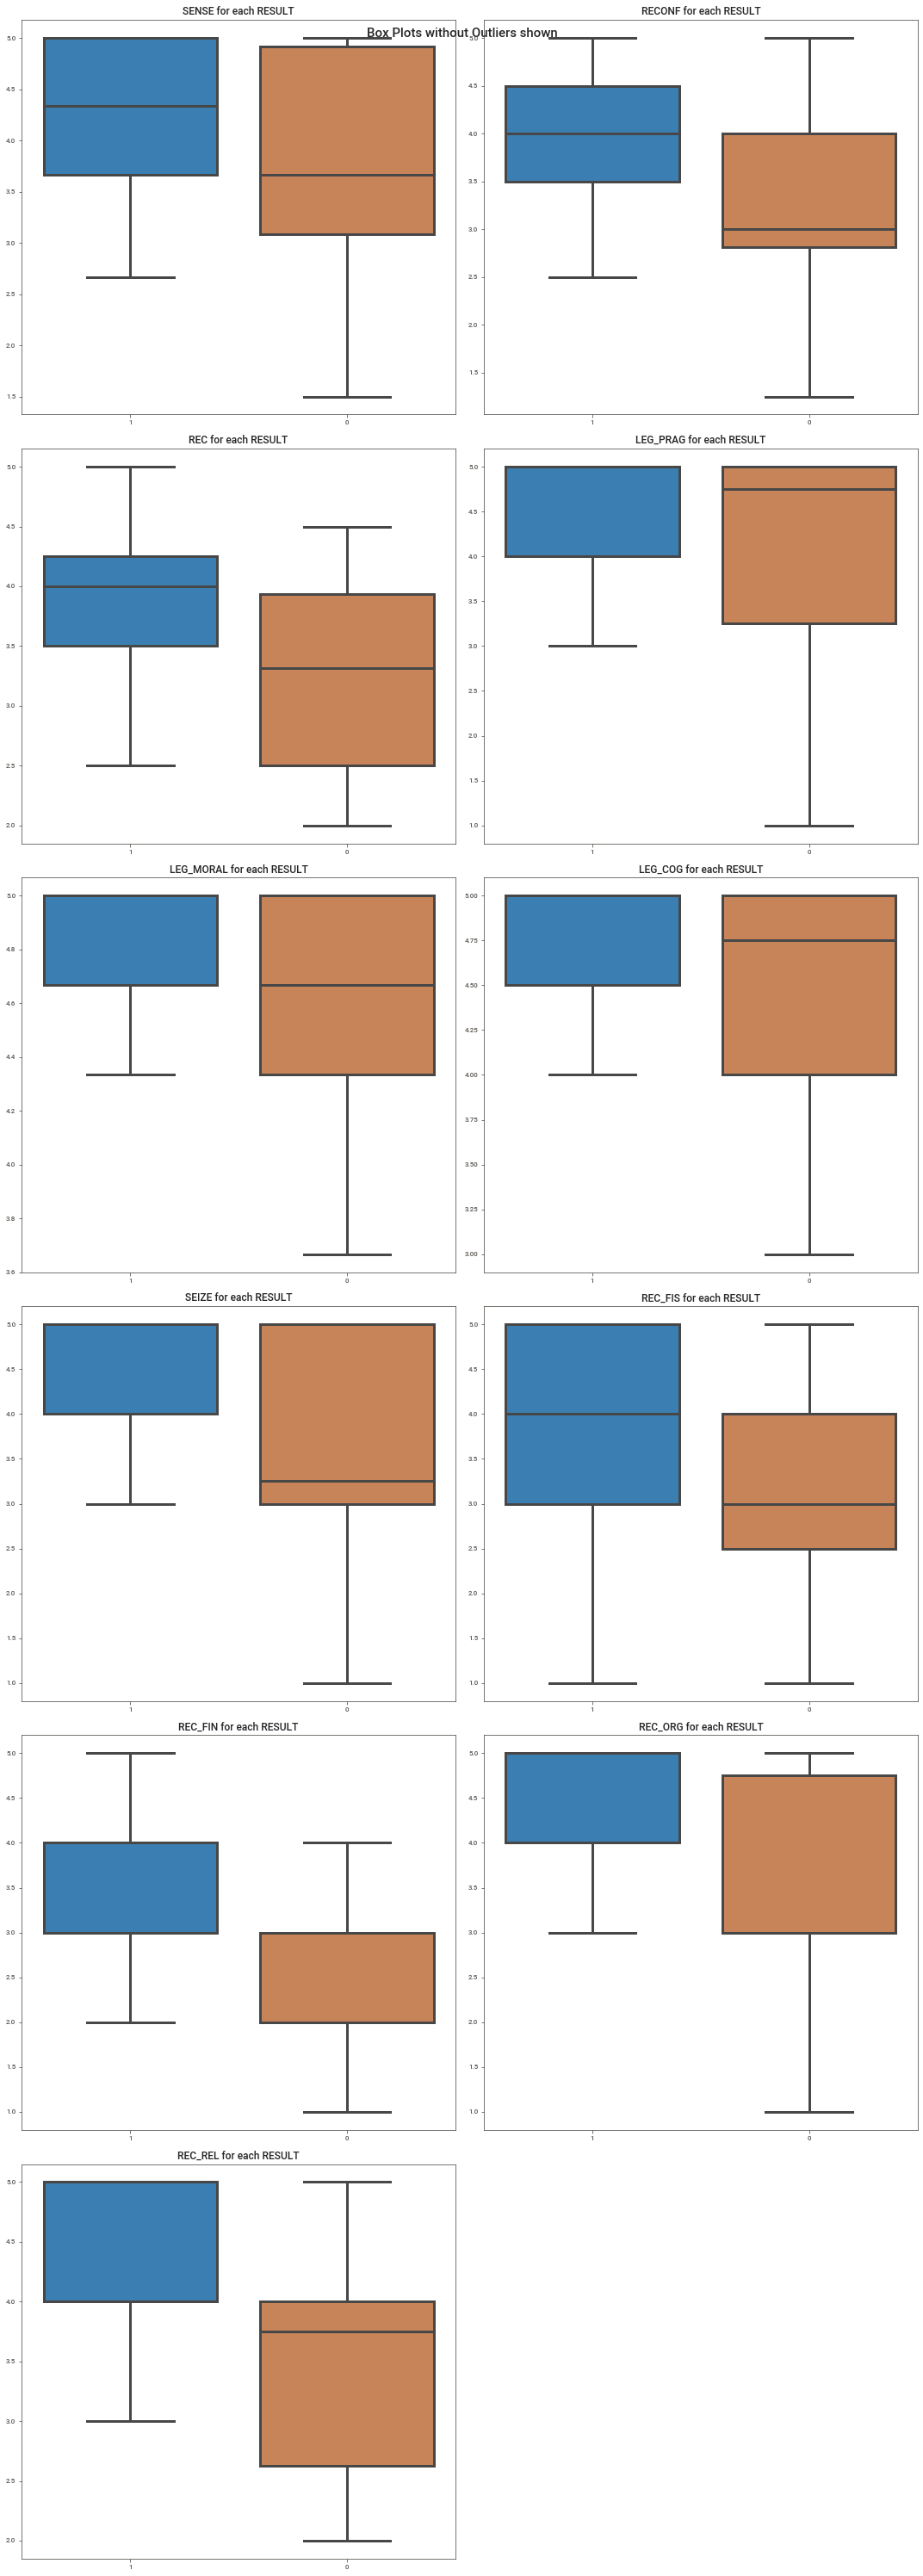

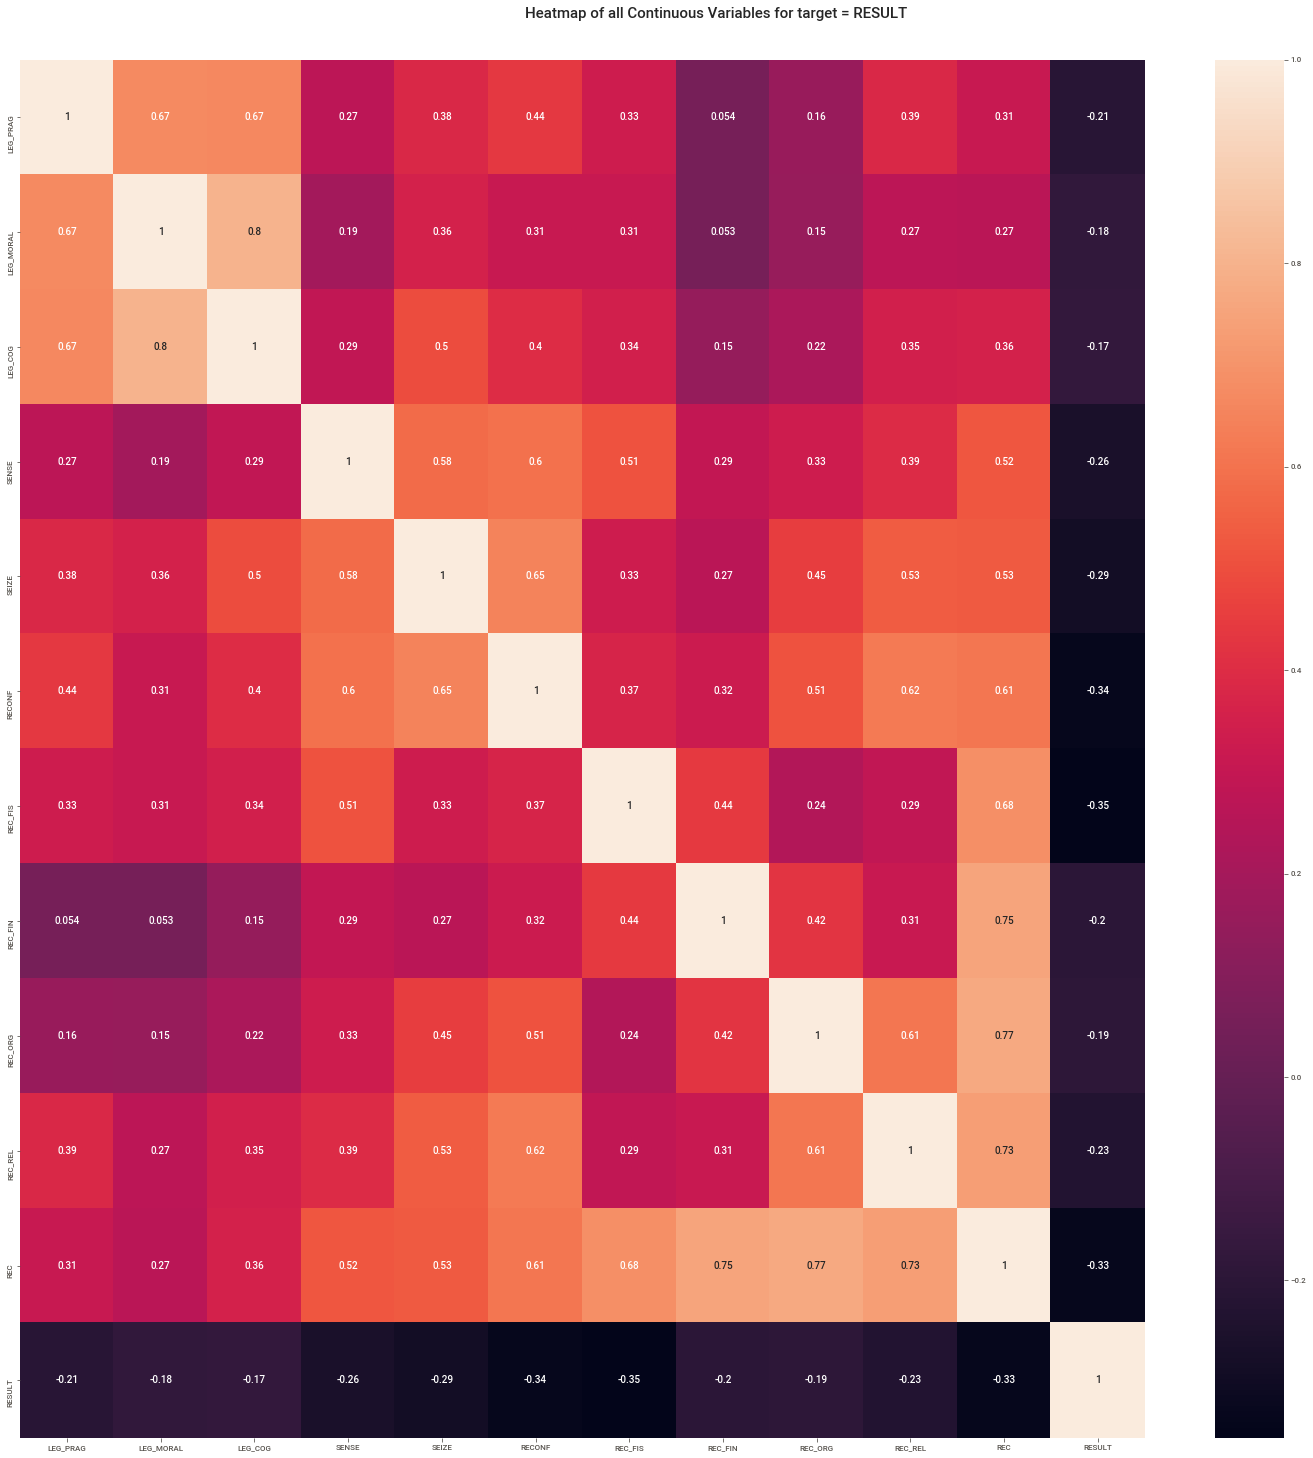

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 23.928

 ###################### VISUALIZATION Completed ########################


In [185]:
# Importing 
from autoviz.AutoViz_Class import AutoViz_Class
# Analyzing & Display the report
AV = AutoViz_Class()
dft = AV.AutoViz(filename='', sep=',', dfte=df, depVar='RESULT')

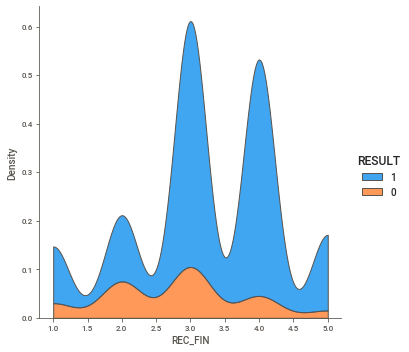

In [187]:
sns.displot(df, x='REC_FIN', kind='kde', hue='RESULT',
            bw_adjust=.5, multiple='stack', fill=True, cut=0)

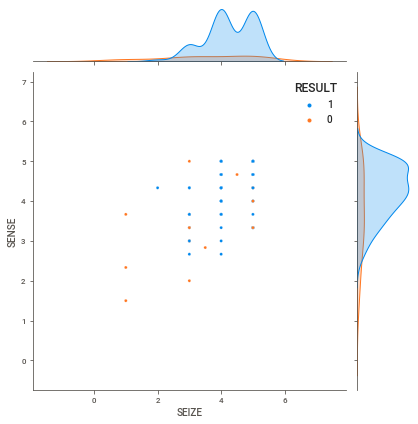

In [188]:
sns.jointplot(data=df, x="SEIZE", y="SENSE", hue="RESULT")

,LEG_PRAG,LEG_MORAL,LEG_COG,SENSE,SEIZE,RECONF,REC_FIS,REC_FIN,REC_ORG,REC_REL,REC,RESULT
CASOS,,,,,,,,,,,,
C1,5.00,4.33,4.00,3.00,3.00,3.50,2.00,1.00,2.00,3.00,2.00,1
C2,4.00,5.00,5.00,3.67,3.00,3.00,4.00,4.00,3.00,3.00,3.50,1
C3,5.00,4.00,5.00,3.33,5.00,3.50,3.00,4.00,3.00,4.00,3.50,1
C4,5.00,5.00,5.00,4.33,5.00,3.50,5.00,2.00,5.00,5.00,4.25,1
C5,5.00,5.00,5.00,4.33,5.00,5.00,5.00,3.00,5.00,5.00,4.50,1


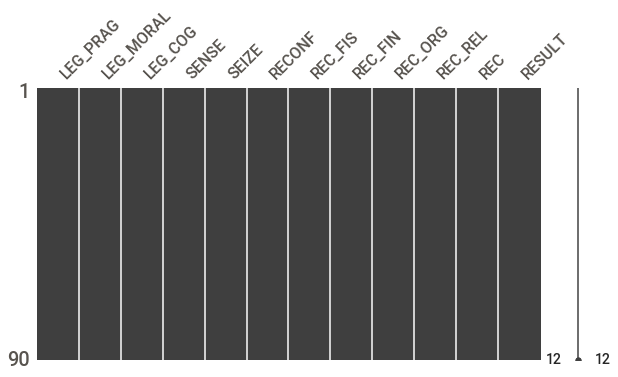

In [189]:
#plot missing data
mi.matrix(df, figsize = (10,5));
df.head(5)

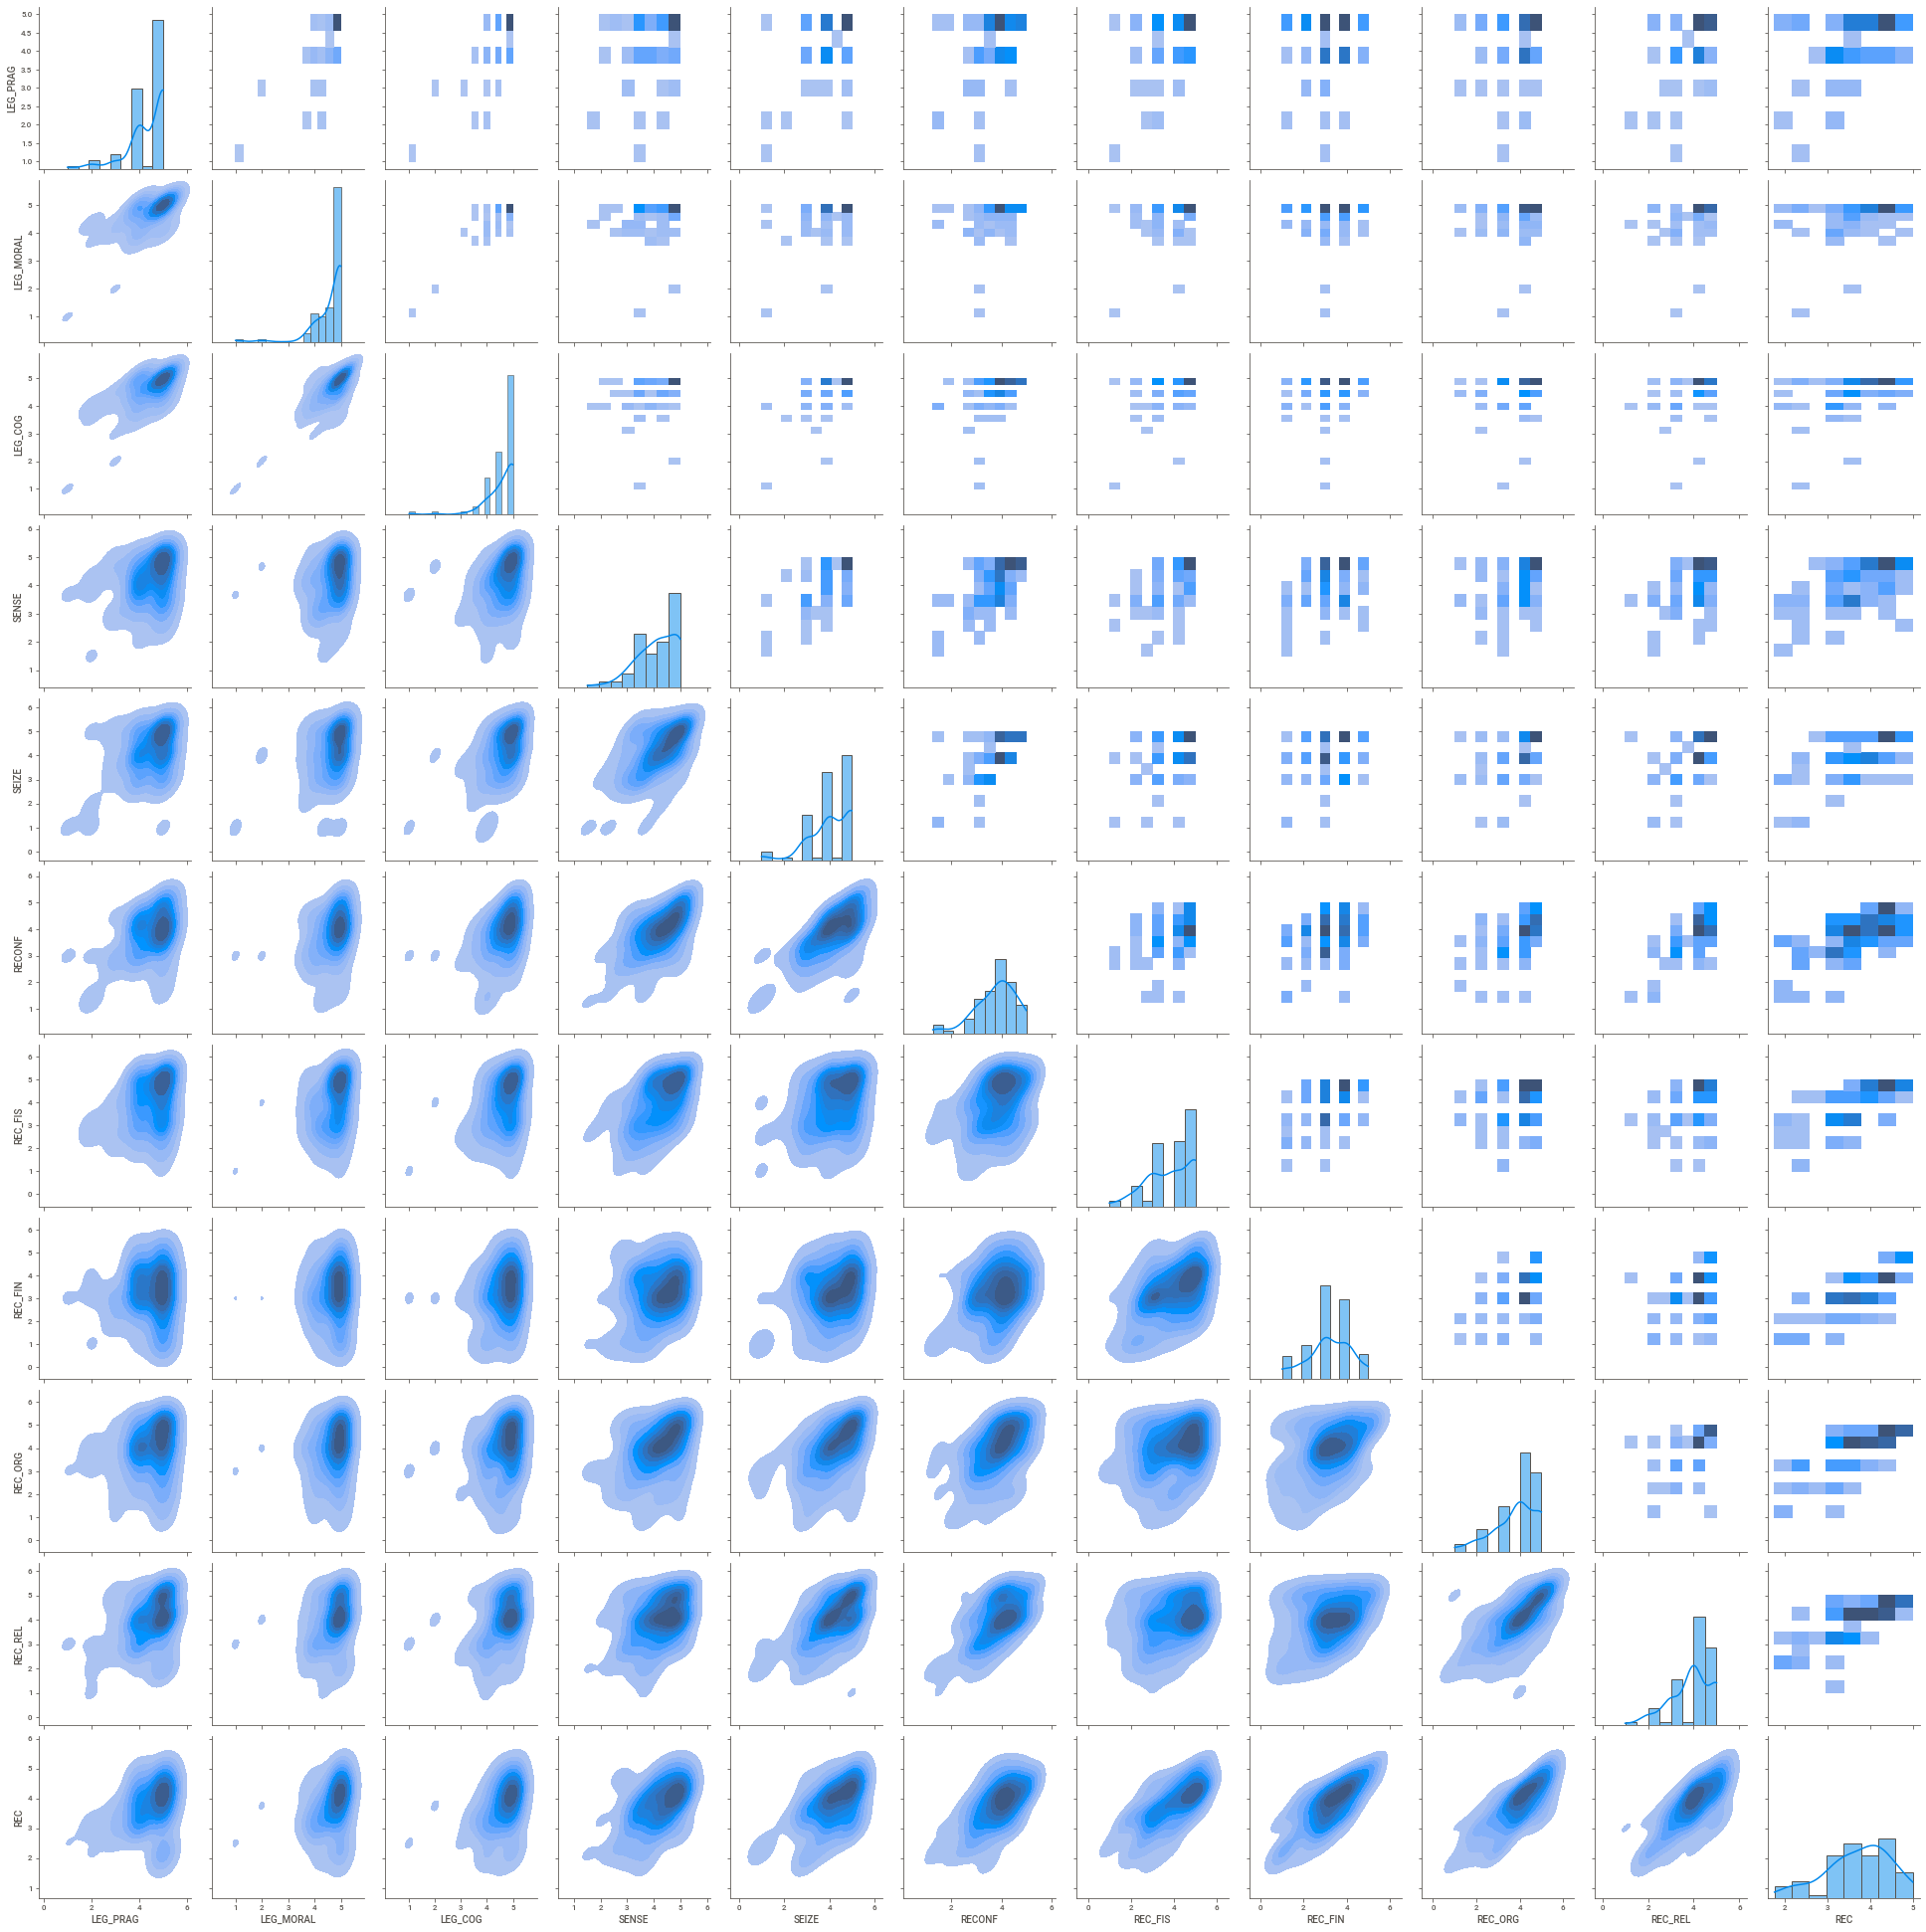

In [190]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [191]:
import dabl

ec = dabl.SimpleClassifier(random_state=0).fit(df, target_col="RESULT")

Running DummyClassifier()
accuracy: 0.800 average_precision: 0.200 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.444
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.800 average_precision: 0.200 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.444

Running GaussianNB()
accuracy: 0.704 average_precision: 0.528 roc_auc: 0.651 recall_macro: 0.608 f1_macro: 0.594
=== new best GaussianNB() (using recall_macro):
accuracy: 0.704 average_precision: 0.528 roc_auc: 0.651 recall_macro: 0.608 f1_macro: 0.594

Running MultinomialNB()
accuracy: 0.744 average_precision: 0.478 roc_auc: 0.697 recall_macro: 0.493 f1_macro: 0.450
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.678 average_precision: 0.263 roc_auc: 0.541 recall_macro: 0.541 f1_macro: 0.542
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.733 average_precision: 0.302 roc_auc: 0.578 recall_macro: 0.575 f1_macro: 0.566
Running DecisionTreeClassifier(class_weight=

Target looks like classification
Linear Discriminant Analysis training set score: 0.646


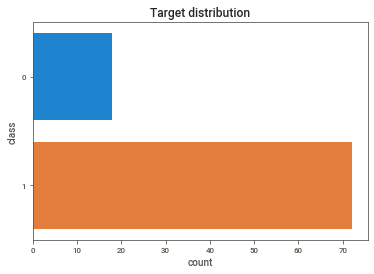

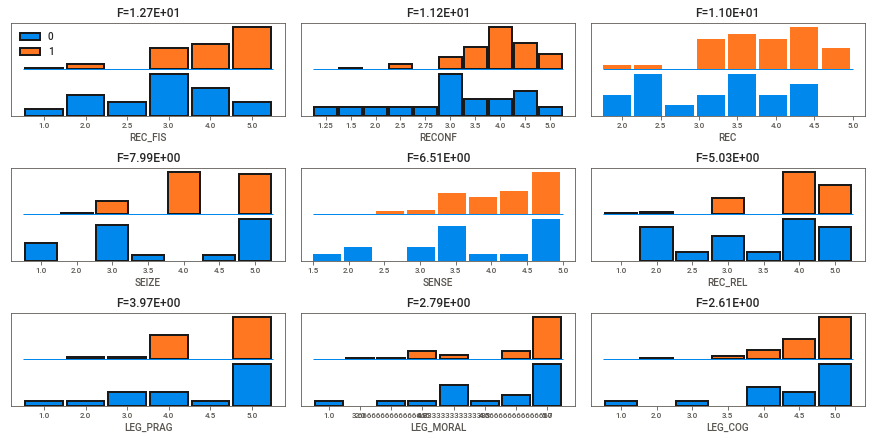

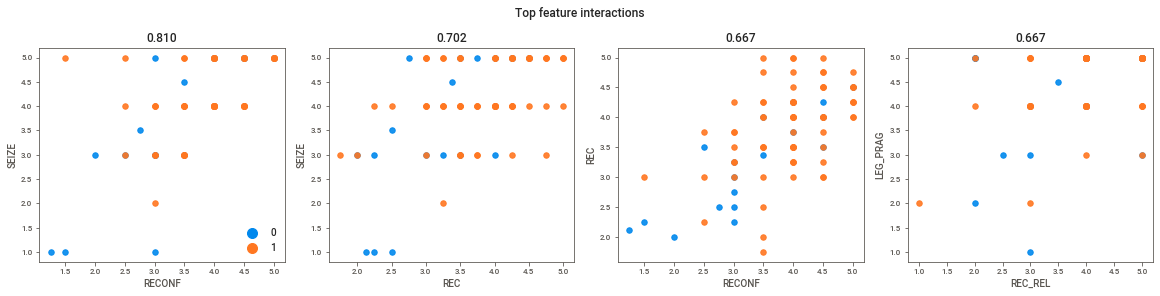

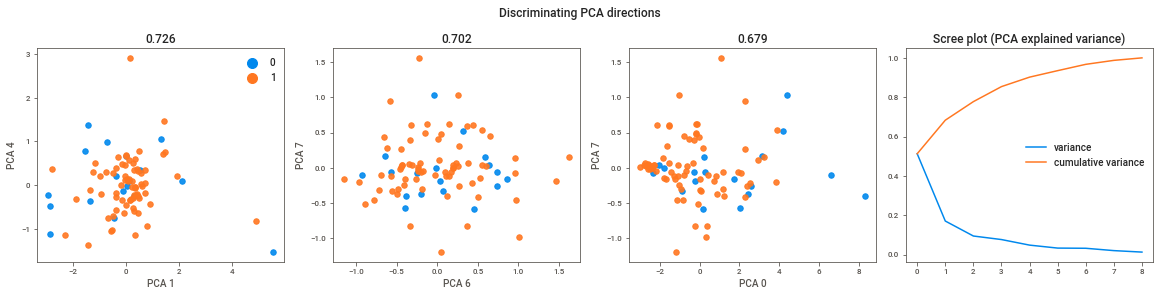

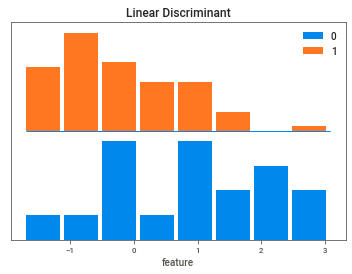

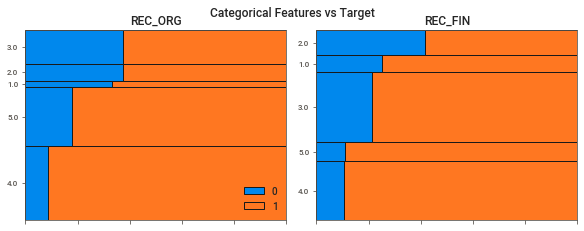

In [192]:
dabl.plot(df, target_col="RESULT")
plt.show()

In [193]:
from sklearn.model_selection import train_test_split

y = np.ravel(df[outputs])
X = df[inputs]

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Calling the model
sc = dabl.SimpleClassifier().fit(X_train, y_train)
# Evaluating accuracy score
print("Accuracy score", sc.score(X_test, y_test))

Running DummyClassifier()
accuracy: 0.747 average_precision: 0.253 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.428
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.747 average_precision: 0.253 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.428

Running GaussianNB()
accuracy: 0.538 average_precision: 0.255 roc_auc: 0.333 recall_macro: 0.467 f1_macro: 0.458
Running MultinomialNB()
accuracy: 0.716 average_precision: 0.455 roc_auc: 0.568 recall_macro: 0.542 f1_macro: 0.542
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.716 average_precision: 0.455 roc_auc: 0.568 recall_macro: 0.542 f1_macro: 0.542

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.641 average_precision: 0.321 roc_auc: 0.583 recall_macro: 0.583 f1_macro: 0.545
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.641 average_precision: 0.321 roc_auc: 0.583 recall_macro: 0.583 f1_macro: 0.545

Running Decis

              precision    recall  f1-score   support

           0       0.17      1.00      0.29         1
           1       1.00      0.77      0.87        22

    accuracy                           0.78        23
   macro avg       0.58      0.89      0.58        23
weighted avg       0.96      0.78      0.85        23

[[ 1  0]
 [ 5 17]]


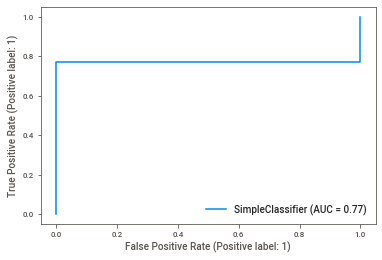

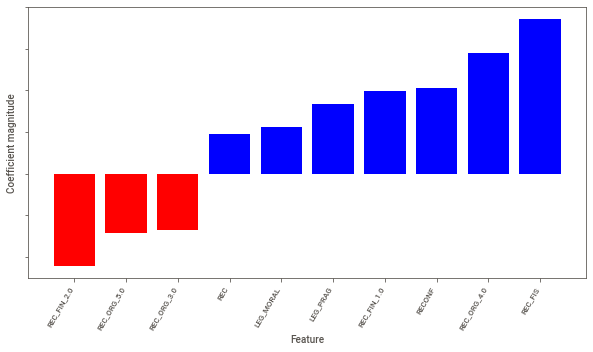

In [194]:
from dabl.models import SimpleClassifier
from dabl.explain import explain

explain(sc, X_test, y_test)

In [320]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

Ys = outputs
Xs = inputs
YXs = []

for k in combinations(Ys, 1):
    Y = np.ravel(df[df.columns.intersection(k)])
    for j in range(1, len(Xs)+1):
        for i in combinations(Xs, j):
            X = df[df.columns.intersection(i)]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
            pipe = make_pipeline(StandardScaler(with_mean=False), GradientBoostingClassifier(),
                                 verbose=False)
            pipe.fit(X_train, y_train)
            score = pipe.score(X_test, y_test)
            if score > 0.92:
                best_model = pipe.fit(X_train, y_train)
            #print(k, 'FEATURES:', X.columns, 'GBC', '# of variables:', j, score)
            YXs.append([k, X.columns, 'GBC', j, score])
        for i in combinations(Xs, j):
            X = df[df.columns.intersection(i)]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
            pipe = make_pipeline(StandardScaler(with_mean=True), LogisticRegression(), verbose=False)
            pipe.fit(X_train, y_train)
            score = pipe.score(X_test, y_test)
            #print(k, 'FEATURES:', X.columns, 'LR', '# of variables:', j, score)
            YXs.append([k, X.columns.values, 'LR', j, score])
        for i in combinations(Xs, j):
            X = df[df.columns.intersection(i)]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
            pipe = make_pipeline(StandardScaler(with_mean=True), SVC(kernel="rbf", C=0.025, probability=True), verbose=False)
            pipe.fit(X_train, y_train)
            score = pipe.score(X_test, y_test)
            #print(k, 'FEATURES:', X.columns, 'LR', '# of variables:', j, score)
            YXs.append([k, X.columns.values, 'SVC', j, score])

results = pd.DataFrame(data=YXs, columns=['Y', 'FEATS', 'MODEL', 'number_FEATS', 'SCORE'])
results.dtypes
print(results.describe())

       number_FEATS    SCORE
count      6,141.00 6,141.00
mean           5.50     0.81
std            1.65     0.09
min            1.00     0.52
25%            4.00     0.74
50%            6.00     0.83
75%            7.00     0.91
max           11.00     0.96


In [323]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


X = df[list(inputs)]
y = df.RESULT
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = Pipeline(steps=[('classifier', RandomForestClassifier())])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

KNeighborsClassifier()
model score: 0.870
SVC(C=0.025, probability=True)
model score: 0.913
DecisionTreeClassifier()
model score: 0.696
RandomForestClassifier()
model score: 0.826
AdaBoostClassifier()
model score: 0.739
GradientBoostingClassifier()
model score: 0.696


Automatically created module for IPython interactive environment


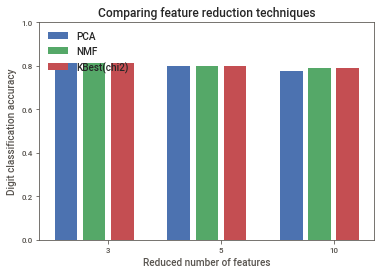

In [294]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

print(__doc__)

pipe = Pipeline([
    # the reduce_dim stage is populated by the param_grid
    ('reduce_dim', 'passthrough'),
    ('classify', LinearSVC(dual=False, max_iter=10000))
])

N_FEATURES_OPTIONS = [3, 5, 10]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipe, n_jobs=1, param_grid=param_grid)

X = df[list(inputs)]
y = df.RESULT

grid.fit(X, y)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

plt.show()

In [310]:
#best model
from dabl.models import SimpleClassifier
from dabl.explain import explain

X = df[['LEG_COG', 'SENSE', 'REC_FIS', 'REC_FIN', 'LEG_PRAG']]
y = df.RESULT
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

#explain(best_model, X_test, y_test)

result = best_model.score(X, y)
print("Accuracy in Test Data: %.3f%%" % (result * 100.0))

#print(X.columns)
print(best_model.steps[0])

Accuracy in Test Data: 75.556%
('standardscaler', StandardScaler())


In [307]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

X = df[['LEG_COG', 'SENSE', 'REC_FIS', 'REC_FIN', 'LEG_PRAG']]
y = df.RESULT

tree = DecisionTreeRegressor()
mlp = make_pipeline(StandardScaler(),
                    MLPRegressor(hidden_layer_sizes=(100, 100),
                                 tol=1e-2, max_iter=500, random_state=1))
tree.fit(X, y)
mlp.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500,
                              random_state=1, tol=0.01))])

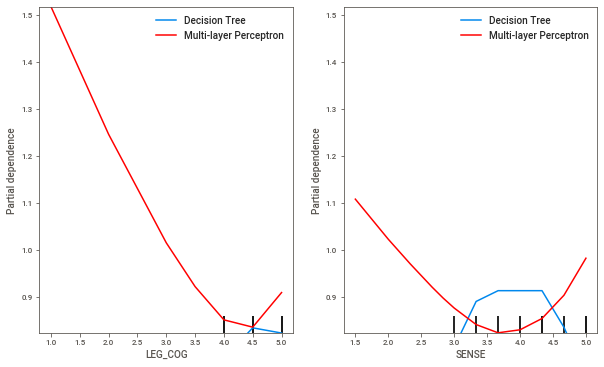

In [308]:
from sklearn.inspection import plot_partial_dependence

mlp_disp = plot_partial_dependence(mlp, X, ['LEG_COG', 'SENSE'], ax=ax2,
                                   line_kw={"color": "red"})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tree_disp.plot(ax=[ax1, ax2], line_kw={"label": "Decision Tree"})
mlp_disp.plot(ax=[ax1, ax2], line_kw={"label": "Multi-layer Perceptron",
                                      "color": "red"})

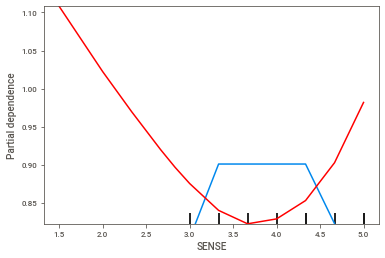

In [309]:
tree_disp = plot_partial_dependence(tree, X, ["SENSE"])
mlp_disp = plot_partial_dependence(mlp, X, ["SENSE"],
                                   ax=tree_disp.axes_,
                                   line_kw={"color": "red"})

In [290]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(reduce_dim__n_components=[2, 5, 10],
                  clf=[SVC(), LogisticRegression(), GradientBoostingClassifier()],
                  clf__C=[0.1, 10, 100])
grid_search = GridSearchCV(best_model, param_grid=param_grid)
print(best_model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())],
         verbose=True)


In [284]:
best_model.named_steps.standardscaler is best_model['standardscaler']

True

In [321]:
selected = results[(results["number_FEATS"]>=1) & (results["SCORE"] >= 0.92)]

print(selected)

              Y                                              FEATS MODEL  \
908   (RESULT,)  Index(['LEG_COG', 'SENSE', 'REC_FIS', 'REC_FIN...   GBC   
978   (RESULT,)  Index(['SENSE', 'REC_FIS', 'REC_FIN', 'REC_ORG...   GBC   
1778  (RESULT,)  Index(['LEG_PRAG', 'LEG_COG', 'SENSE', 'REC_FI...   GBC   

      number_FEATS  SCORE  
908              4   0.96  
978              4   0.96  
1778             5   0.96  


In [322]:
X = df[['LEG_COG', 'SENSE', 'REC_FIS', 'REC_FIN', 'REC_ORG']]
Y = df.RESULT
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=3)
pipe = make_pipeline(StandardScaler(with_mean=True), GradientBoostingClassifier(), verbose=True)
pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)

print(score)

[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline]  (step 2 of 2) Processing gradientboostingclassifier, total=   0.0s
0.8260869565217391


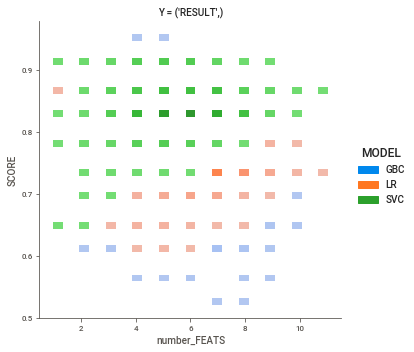

In [253]:
sns.displot(results, y='SCORE', x='number_FEATS', hue='MODEL', legend=True, col='Y')

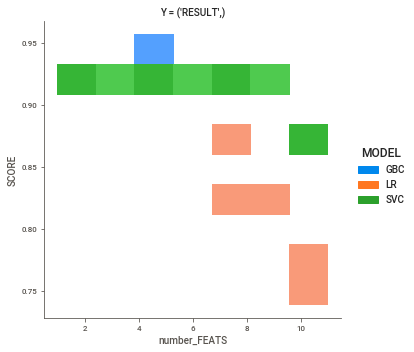

In [200]:
#filtering only with the max score in each combination of Y and Model type
g = results.loc[results.groupby(["Y", "MODEL", 'number_FEATS'])["SCORE"].idxmax()]
g.to_clipboard(sep='\t')
#print(g)
sns.displot(g, y='SCORE', x='number_FEATS', hue='MODEL', legend=True, col='Y')

In [201]:
import plotly_express as px
fig = px.bar(results, x='number_FEATS', y='SCORE', color='MODEL', hover_name='FEATS')
fig.show()

In [202]:
# Importance of attribute with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, Y)
print(X.columns)
print(model.feature_importances_)

Index(['LEG_PRAG', 'LEG_MORAL', 'LEG_COG', 'SENSE', 'SEIZE', 'RECONF',
       'REC_FIS', 'REC_FIN', 'REC_ORG', 'REC_REL', 'REC'],
      dtype='object')
[0.06840219 0.0770055  0.06816688 0.10635861 0.12627966 0.10422506
 0.11335598 0.11290597 0.06170756 0.05914364 0.10244894]


In [203]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3)
fit = rfe.fit(X, Y)
print("Predictor Variables:", X[0:5])
print("Selected Variables: %s" % fit.support_)
print("Attribute Ranking: %s" % fit.ranking_)
print("Number of Best Attributes: %d" % fit.n_features_)

Predictor Variables:        LEG_PRAG  LEG_MORAL  LEG_COG  SENSE  SEIZE  RECONF  REC_FIS  REC_FIN  \
CASOS                                                                         
C1         5.00       4.33     4.00   3.00   3.00    3.50     2.00     1.00   
C2         4.00       5.00     5.00   3.67   3.00    3.00     4.00     4.00   
C3         5.00       4.00     5.00   3.33   5.00    3.50     3.00     4.00   
C4         5.00       5.00     5.00   4.33   5.00    3.50     5.00     2.00   
C5         5.00       5.00     5.00   4.33   5.00    5.00     5.00     3.00   

       REC_ORG  REC_REL  REC  
CASOS                         
C1        2.00     3.00 2.00  
C2        3.00     3.00 3.50  
C3        3.00     4.00 3.50  
C4        5.00     5.00 4.25  
C5        5.00     5.00 4.50  
Selected Variables: [False False False False  True  True  True False False False False]
Attribute Ranking: [6 3 2 4 1 1 1 8 9 7 5]
Number of Best Attributes: 3


In [224]:
# Evaluation using training and test data

test_size = 0.3
seed = 3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy in Test Data: %.3f%%" % (result * 100.0))

Accuracy in Test Data: 88.889%


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.92      0.96      0.94        25

    accuracy                           0.89        27
   macro avg       0.46      0.48      0.47        27
weighted avg       0.85      0.89      0.87        27

[[ 0  2]
 [ 1 24]]


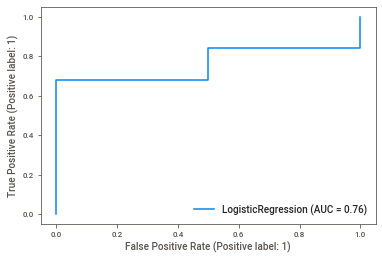

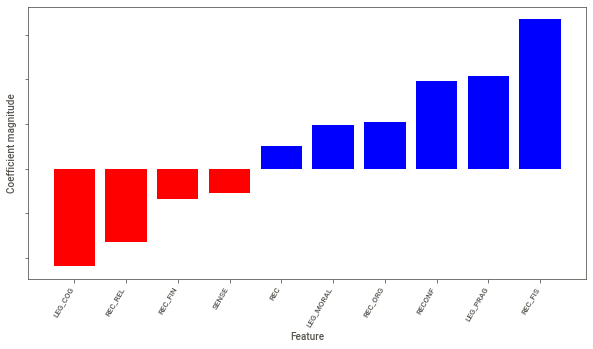

In [226]:
explain(model, X_test, Y_test)

In [227]:
# Evaluation using training and test data

test_size = 0.3
seed = 3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy in Test Data: %.3f%%" % (result * 100.0))

Accuracy in Test Data: 85.185%


              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.96      0.88      0.92        25

    accuracy                           0.85        27
   macro avg       0.60      0.69      0.62        27
weighted avg       0.90      0.85      0.87        27

[[ 1  1]
 [ 3 22]]
Computing partial dependence plots...


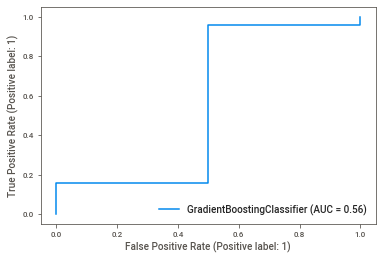

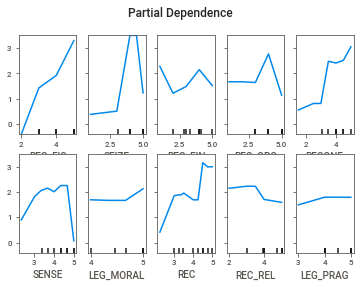

In [228]:
explain(model, X_test, Y_test)

In [237]:
# Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

columns = inputs
X = df[inputs]
Y = df.RESULT

num_folds = 32
seed = 500
kfold = KFold(num_folds, shuffle=True, random_state = seed)
#model = LogisticRegression(max_iter=500)
model = GradientBoostingClassifier()
result = cross_val_score(model, X, Y, cv=kfold)
print("Final accuracy: %.3f%%" % (result.mean() * 100.0))

Final accuracy: 77.083%


Automatically created module for IPython interactive environment


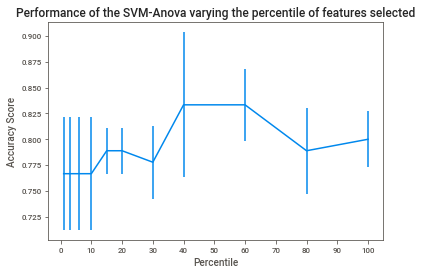

In [238]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# #############################################################################
# Import some data to play with
#X, y = load_iris(return_X_y=True)
columns = inputs
X = df[inputs]
y = df.RESULT

# Add non-informative features
np.random.seed(0)
#X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))

# #############################################################################
# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator
clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(gamma="auto"))])

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()

In [239]:
df.dtypes

LEG_PRAG     float64
LEG_MORAL    float64
LEG_COG      float64
SENSE        float64
SEIZE        float64
RECONF       float64
REC_FIS      float64
REC_FIN      float64
REC_ORG      float64
REC_REL      float64
REC          float64
RESULT        object
dtype: object